<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/lecture3/linkage_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage function

As we discussed in class, the linkage determines how the distance between clusters is calculated. Let us see, in a toy dataset, how the linkage function affects the dendrogram.

In [ ]:
# define the pattern matirx
pattern_matrix = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

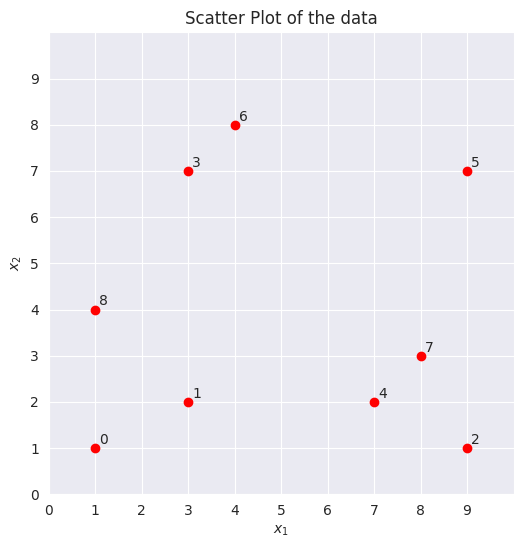

In [ ]:
# plot vectors in a 2D space
plt.figure(figsize=(6, 6))
plt.scatter(pattern_matrix[:,0], pattern_matrix[:,1], c='r')

# Create numbered labels for each vector
for i in range(pattern_matrix.shape[0]):
    plt.annotate(str(i), xy=(pattern_matrix[i,0], pattern_matrix[i,1]),
                 xytext=(3, 3), textcoords='offset points')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

Now let us calculate the distance between clusters using some of the most common methods, e.g., single, complete, average, and ward methods.

**Note** This time I use the `linkage` function to calcualte the proximity matrix.

In [ ]:
P1 = linkage(pattern_matrix, method='single', metric='euclidean')
P2 = linkage(pattern_matrix, method='complete', metric='euclidean')
P3 = linkage(pattern_matrix, method='average', metric='euclidean')
P4 = linkage(pattern_matrix, method='ward', metric='euclidean')

Not we plot all four dendrograms

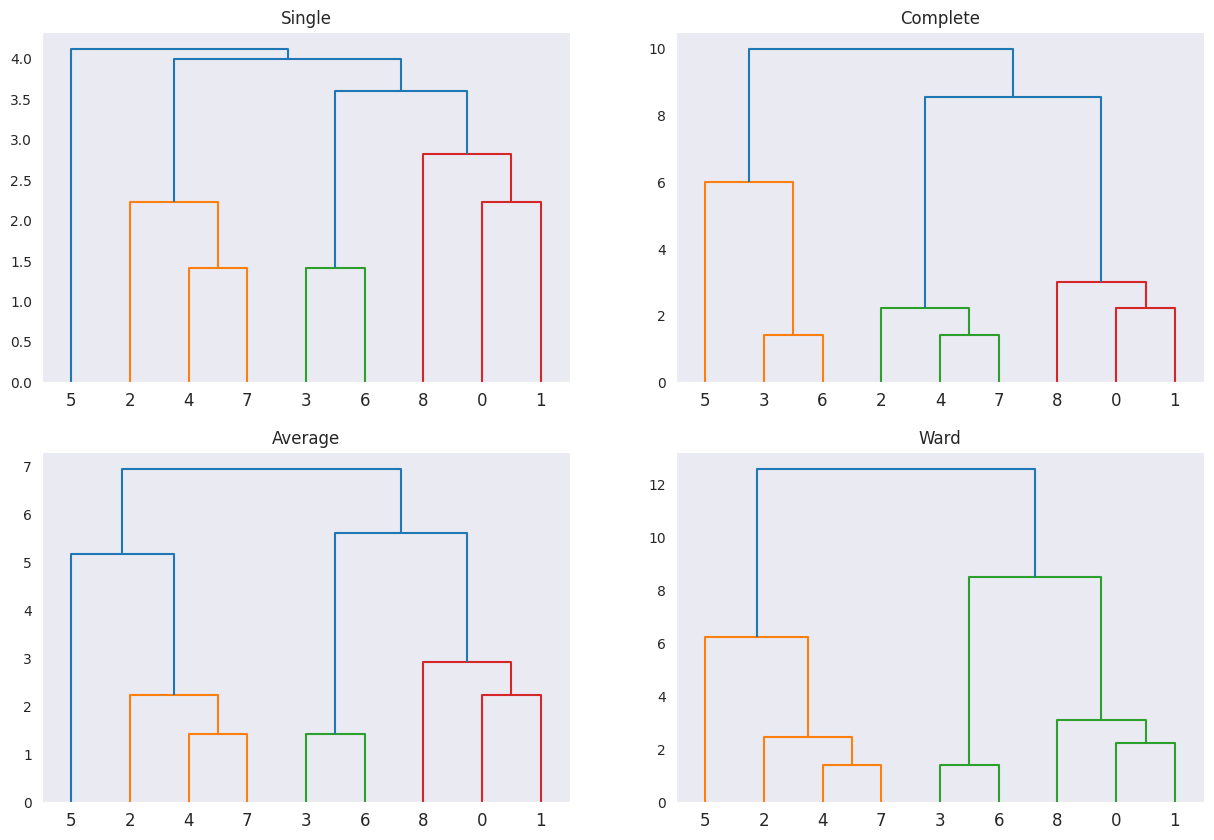

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(P1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(P2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(P3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(P4), plt.title('Ward')
plt.show()

What can you say about the different linkage methods?

# Real dataset: Protein consumption
We use a dataset from the book Biostatistics with R, which contains information for nine different protein sources and their respective consumption from various countries. We'll use this data to group countries according to their protein consumption.

In [ ]:
# download dataset in csv file direclty
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
# print a small sample of the data
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [ ]:
# We wont use the country, only numerical variables
# hence, I select the data after the 1st column
X = df.iloc[:,1:10]

# get proximity matrix using the ward method
Z2 = linkage(X, method='ward', metric='euclidean')

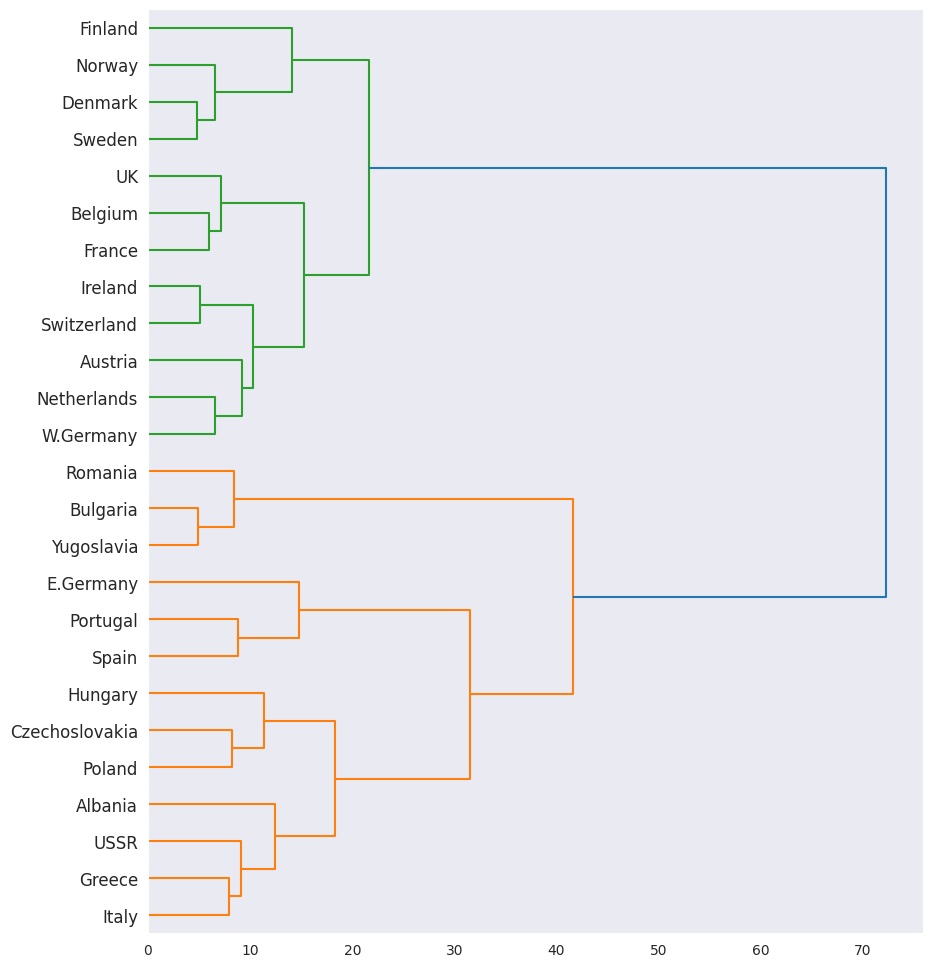

In [ ]:
# get the country names to make a nice dendrogram
labelList = list(df['Country'])

plt.figure(figsize=(10, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=12
)
plt.show()

## Exercise: 1) test whether scaling the data changes the clustering results, and 2) evaluate whether there are linkage methods that are more sensitive to scaling